In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("C:/Users/gaura/OneDrive/Desktop/Data Science/AI & Deep Learning/Class 13-14 Files/Final Projects/3. Airlines Passengers Forecasting/International Airline Passengers.csv")

In [4]:
df.head()

,Month,No_passengers_thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
import matplotlib.pyplot as plt

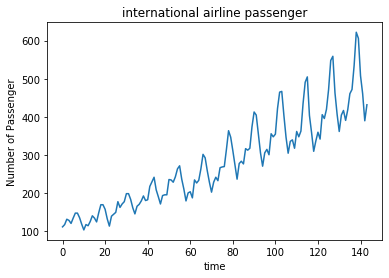

In [6]:
dataset = df.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

Preprocessing Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   No_passengers_thousands  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
#scaling 
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)

In [18]:
df.shape

(144, 1)

In [19]:
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [158]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)
test_size=len(df)-training_size

In [159]:
training_size

93

In [160]:
test_size

51

In [161]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [162]:
test_data

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.779

In [163]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [235]:
time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(91, 1),y_train:(91,),X_test:(49, 1),y_test(49,)


In [236]:
X_test

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.779

In [237]:
#reshape
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(91, 1),y_train:(91, 1),X_test:(49, 1),y_test(49, 1)


In [238]:
# reshape input to be [samples, time steps, features] 3D which is required for LSTM

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [239]:
X_train.shape

(91, 1, 1)

In [240]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [241]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Train on 91 samples, validate on 49 samples
Epoch 1/100
91/91 [==============================] - 2s 24ms/sample - loss: 0.0225 - val_loss: 0.0911
Epoch 2/100
91/91 [==============================] - 0s 3ms/sample - loss: 0.0097 - val_loss: 0.0383
Epoch 3/100
91/91 [==============================] - 0s 3ms/sample - loss: 0.0057 - val_loss: 0.0127
Epoch 4/100
91/91 [==============================] - 0s 3ms/sample - loss: 0.0027 - val_loss: 0.0100
Epoch 5/100
91/91 [==============================] - 0s 3ms/sample - loss: 0.0020 - val_loss: 0.0137
Epoch 6/100
91/91 [==============================] - 0s 3ms/sample - loss: 0.0019 - val_loss: 0.0109
Epoch 7/100
91/91 [==============================] - 0s 3ms/sample - loss: 0.0023 - val_loss: 0.0124
Epoch 8/100
91/91 [==============================] - ETA: 0s - loss: 0.0019  - 0s 3ms/sample - loss: 0.0020 - val_loss: 0.0118
Epoch 9/100
91/91 [==============================] - 0s 3ms/sample - loss: 0.0022 - val_loss: 0.0107
Epoch 10/100
91/91 [

In [242]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 1, 50)             10400     
_________________________________________________________________
lstm_49 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [243]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [244]:
test_predict

array([[0.41095394],
       [0.3412889 ],
       [0.41095394],
       [0.4288736 ],
       [0.40099803],
       [0.5104127 ],
       [0.49452278],
       [0.5084272 ],
       [0.640769  ],
       [0.7246253 ],
       [0.7284986 ],
       [0.6053804 ],
       [0.49253556],
       [0.4089628 ],
       [0.470666  ],
       [0.4786208 ],
       [0.43484616],
       [0.522321  ],
       [0.49452278],
       [0.5243048 ],
       [0.6662301 ],
       [0.77476466],
       [0.80155927],
       [0.6053804 ],
       [0.516368  ],
       [0.41891852],
       [0.47265485],
       [0.51835245],
       [0.4825973 ],
       [0.6093197 ],
       [0.58960736],
       [0.6368443 ],
       [0.73817027],
       [0.88285375],
       [0.9033859 ],
       [0.7207494 ],
       [0.61128855],
       [0.522321  ],
       [0.60735023],
       [0.6309538 ],
       [0.5797364 ],
       [0.6348813 ],
       [0.7168709 ],
       [0.73817027],
       [0.85844487],
       [1.0186535 ],
       [0.98977304],
       [0.807

In [245]:
##Transformback to original form scaler
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [246]:
test_predict

array([[0.41095394],
       [0.3412889 ],
       [0.41095394],
       [0.4288736 ],
       [0.40099803],
       [0.5104127 ],
       [0.49452278],
       [0.5084272 ],
       [0.640769  ],
       [0.7246253 ],
       [0.7284986 ],
       [0.6053804 ],
       [0.49253556],
       [0.4089628 ],
       [0.470666  ],
       [0.4786208 ],
       [0.43484616],
       [0.522321  ],
       [0.49452278],
       [0.5243048 ],
       [0.6662301 ],
       [0.77476466],
       [0.80155927],
       [0.6053804 ],
       [0.516368  ],
       [0.41891852],
       [0.47265485],
       [0.51835245],
       [0.4825973 ],
       [0.6093197 ],
       [0.58960736],
       [0.6368443 ],
       [0.73817027],
       [0.88285375],
       [0.9033859 ],
       [0.7207494 ],
       [0.61128855],
       [0.522321  ],
       [0.60735023],
       [0.6309538 ],
       [0.5797364 ],
       [0.6348813 ],
       [0.7168709 ],
       [0.73817027],
       [0.85844487],
       [1.0186535 ],
       [0.98977304],
       [0.807

In [247]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.043608964401542445

In [248]:
# For test data
math.sqrt(mean_squared_error(ytest,test_predict))

0.09466042029027201

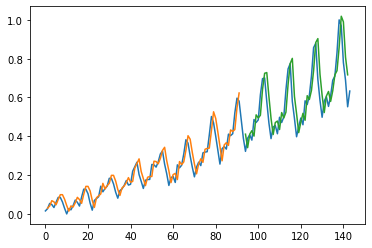

In [249]:
### Plotting 
# shift train predictions for plotting
look_back=1
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()